# Pseudo-code

```
Start with the weights all set to 1
Repeat R number of times
    Calculate the gradient of the entire dataset
    Update the weights vector by alpha * gradient
    Return the weights vector
```

In [92]:
import unittest
import numpy as np
import matplotlib.pyplot as plt
import random

In [93]:
def load_data():
    X = []
    y = []
    with open ('testSet.txt') as f:
        for line in f.readlines():
            cols = line.strip().split()
            X.append([1.0, float(cols[0]), float(cols[1])])
            y.append(int(cols[2]))
    return X, y

In [94]:
def sigmoid(X):
    return 1.0 / (1 + np.exp(np.negative(X)))

In [95]:
def plot_best_fit(weights):
    weights = weights.getA() # Return self as ndarray object
    X, y = load_data()
    X_arr = np.mat(X).getA()
    n, _ = np.shape(X_arr)
    
    x1 = []
    y1 = []
    
    x2 = []
    y2 = []
    
    for i in range(n):
        if int(y[i]) == 1:
            x1.append(X_arr[i, 1])
            y1.append(X_arr[i, 2])
        else:
            x2.append(X_arr[i, 1])
            y2.append(X_arr[i, 2])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x1, y1, s = 30, c = 'red', marker = 's')
    ax.scatter(x2, y2, s = 30, c = 'green')
    
    X = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * X) / weights[2]
    ax.plot(X, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [96]:
def gradient_ascent(X, y):
    X_mat = np.mat(X)
    m, n = np.shape(X_mat)
    y_transposed = np.mat(y).transpose()
    alpha = 0.001
    epochs = 500
    weights = np.ones((n, 1))
    
    for k in range(epochs):
        h = sigmoid(X_mat * weights)
        error = y_transposed - h
        weights = weights + alpha * X_mat.transpose() * error

    return weights

In [97]:
def stochastic_gradient_ascent(X, y):
    X_arr = np.array(X)
    m, n = np.shape(X_arr)
    alpha = 0.01
    weights = np.ones(n)
    
    for i in range(m):
        h = sigmoid(sum(X_arr[i] * weights))
        error = y[i] - h
        weights = weights + alpha * error * X_arr[i]
    return weights

In [101]:
def stochastic_gradient_ascent_modified(X, y, epochs = 150):
    m, n = np.shape(X)
    X_arr = np.array(X)
    weights = np.ones(n) * 1.0
    index = range(m)
    
    for j in range(epochs):
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            rand_index = int(random.uniform(0, len(index)))
            h = sigmoid(np.sum(X[rand_index] * weights))
            error = y[rand_index] - h
            weights = weights + alpha * error * X_arr[rand_index]
            np.delete(X_arr, rand_index)
    return weights

In [102]:
def classify_vector(X, weights):
    prob = sigmoid(np.sum(X * weights))
    return 1.0 if prob > 0.5 else 0.0

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
...

error rate: 0.29850746268656714


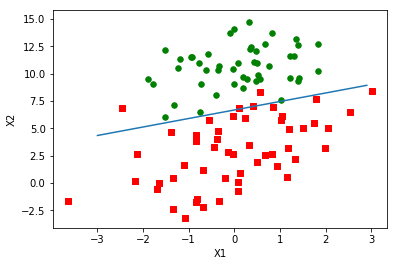

..

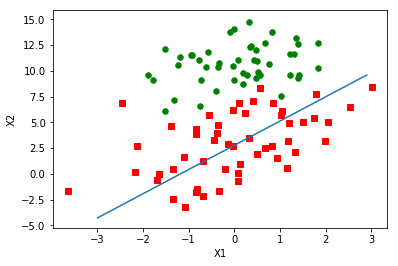

.

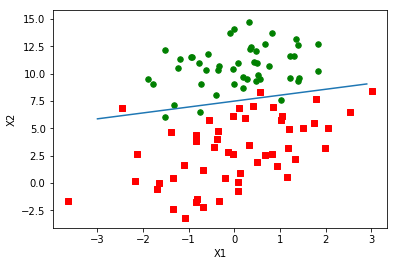

.
----------------------------------------------------------------------
Ran 7 tests in 4.904s

OK


In [107]:
class TestGradientAscent(unittest.TestCase):
    def test_load_data(self):
        X, y = load_data()
        self.assertEqual(len(X), len(y))
        
    def test_sigmoid(self):
        expected = [0.5, 1]
        got = sigmoid([0, 100]).tolist()
        self.assertEqual(expected, got)
    
    def test_gradient_ascent(self):
        X, y = load_data()
        expected = 3
        got = len(gradient_ascent(X, y))
        self.assertEqual(expected, got)
    
    def test_plot_best_fit(self):
        X, y = load_data()
        weights = gradient_ascent(X, y)
        plot_best_fit(weights)
    
    def test_stochastic_gradient_ascent(self):
        X, y = load_data()
        weights = stochastic_gradient_ascent(X, y)
        plot_best_fit(np.mat(weights.reshape(-1, 1)))
        
    def test_stochastic_gradient_ascent_modified(self):
        X, y = load_data()
        weights = stochastic_gradient_ascent_modified(X, y)
        plot_best_fit(np.mat(weights.reshape(-1, 1)))
    
    def test_colic(self):
        train_data = open('horseColicTraining.txt')
        test_data = open('horseColicTest.txt')
        
        X_train = []
        y_train = []
        
        for line in train_data.readlines():
            cols = line.strip().split('\t')
            lines = np.array(cols[0:21]).astype(float)
            X_train.append(lines)
            y_train.append(float(cols[21]))

        train_weights = stochastic_gradient_ascent_modified(X_train, y_train, 500)        
        error_count = 0
        num_test_vec = 0.0
        
        for line in test_data.readlines():
            num_test_vec += 1.0
            cols = line.strip().split('\t')
#             lines = []
#             for i in range(21):
#                 lines.append(float(cols[i]))
            lines = np.array(cols[0:21]).astype(float)
            if int(classify_vector(lines, train_weights)) != int(cols[21]):
                error_count += 1

        error_rate = float(error_count) / num_test_vec

        train_data.close()
        test_data.close()

        print('error rate: {}'.format(error_rate))
        
if __name__ == '__main__':
    unittest.main(argv = ['first-arg-is-ignored'], exit = False)